# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Wczytanie danych
data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


k_best = 30  # Wybór liczby najlepszych cech
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

knn_classifier_selected = KNeighborsClassifier(n_neighbors=3)
knn_classifier_selected.fit(X_train_selected, y_train)
y_pred_selected = knn_classifier_selected.predict(X_test_selected)

# Dokładność klasyfikacji na danych zredukowanych
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy after feature selection:", accuracy_selected)


Accuracy: 0.4785243741765481
Accuracy after feature selection: 0.49907773386034254


In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clustering can you find?

4. K-means with scikit-learn

4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

Mouse Data:


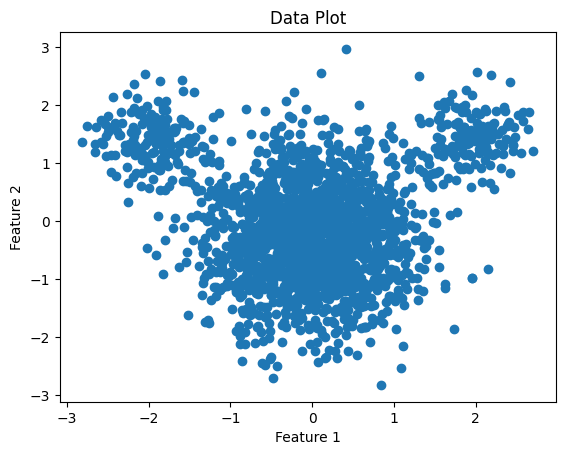

Lines Data:


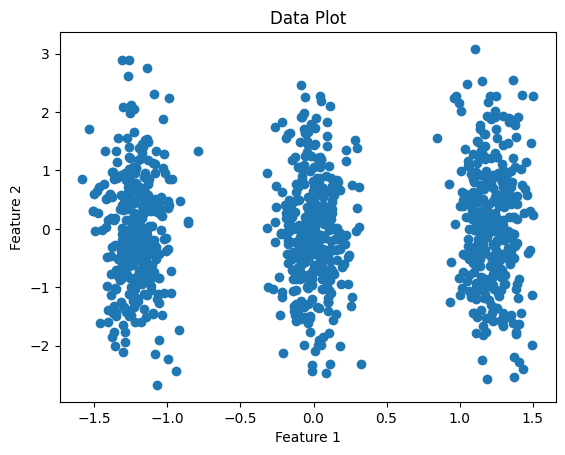

In [14]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Plot')
    plt.show()

# Wczytanie danych z plików
mouse_data = read_file("mouse.csv")
lines_data = read_file("lines.csv")

# Wyświetlenie danych
print("Mouse Data:")
plot_data(mouse_data)

print("Lines Data:")
plot_data(lines_data)

In [15]:
# TODO call functions above and try to find clusters in obtained datasets


### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [16]:
# def visualize_clusters(clusters, centroids): 
#     #clusters: list of numpy arrays (each array with examples in one cluster)
#     #centroids: numpy array
#     for c in clusters:
#         plt.scatter(c[:,0], c[:,1])
#     plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
#     plt.show()

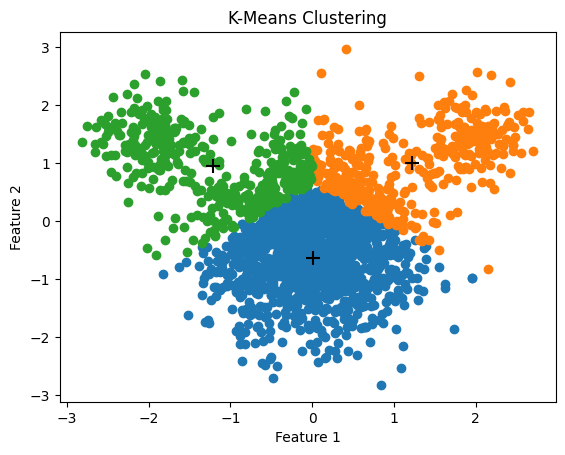

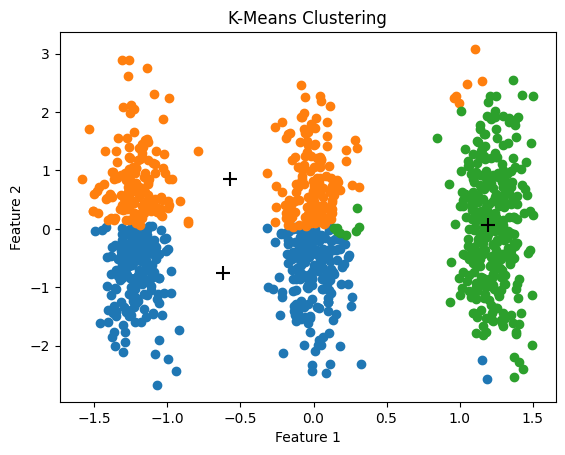

In [17]:
from sklearn.cluster import KMeans

def visualize_clusters(clusters, centroids): 

    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.show()


mouse_kmeans = KMeans(n_clusters=3, random_state=42)
mouse_kmeans.fit(mouse_data)
mouse_clusters = [mouse_data[mouse_kmeans.labels_ == i] for i in range(3)]
mouse_centroids = mouse_kmeans.cluster_centers_
visualize_clusters(mouse_clusters, mouse_centroids)

lines_kmeans = KMeans(n_clusters=3, random_state=42)
lines_kmeans.fit(lines_data)
lines_clusters = [lines_data[lines_kmeans.labels_ == i] for i in range(3)]
lines_centroids = lines_kmeans.cluster_centers_
visualize_clusters(lines_clusters, lines_centroids)


# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [18]:
import pandas as pd

data = pd.read_csv("customers.csv")

data = data.drop(columns="Address")

print(data.head())


from sklearn.feature_selection import VarianceThreshold

thresholds = [0, 0.1, 0.5, 1, 5, 10]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    data_filtered = selector.fit_transform(data)
    remaining_features = data_filtered.shape[1]
    print(f"For threshold={threshold}, remaining features: {remaining_features}")


# Utworzenie macierzy korelacji
correlation_matrix = data.corr().abs()

print("Correlation Matrix:")
print(correlation_matrix)

correlation_threshold = 0.7

# Znalezienie indeksów kolumn o wysokiej korelacji
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > correlation_threshold:
            high_correlation_columns.add(correlation_matrix.columns[i])

# Usunięcie cech o wysokiej korelacji
data_filtered = data.drop(columns=high_correlation_columns)

print("Number of features after removing highly correlated features:", data_filtered.shape[1])



   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2  
For threshold=0, remaining features: 9
For threshold=0.1, remaining features: 9
For threshold=0.5, remaining features: 8
For threshold=1, remaining features: 7
For threshold=5, remaining features: 6
For threshold=10, remaining features: 6
Correlation Matrix:
                 Customer Id       Age       Edu  Years Employed    Income  \
Customer Id         

# Homework

* Finish all the above tasks in this notebook that you have not finished during class.
* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the characteristics of their centroids. What do all cereals within a certain group have in common?
* Write a **report** containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from random import uniform

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, epsilon=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.epsilon = epsilon
        
    def fit(self, X_train):
        # Losowe inicjalizowanie centroidów
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = [euclidean(x, centroid) for centroid in self.centroids]
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) if cluster else prev_centroids[i]
                              for i, cluster in enumerate(sorted_points)]
            
            if np.all([np.linalg.norm(prev_centroids[i] - self.centroids[i]) < self.epsilon for i in range(self.n_clusters)]):
                break
            
            iteration += 1
        
        self.labels_ = np.zeros(X_train.shape[0])
        for i, x in enumerate(X_train):
            dists = [euclidean(x, centroid) for centroid in self.centroids]
            self.labels_[i] = np.argmin(dists)
        
        return self

# Wczytanie danych
data = pd.read_csv("cereal.csv")

# Usunięcie kolumn "name" i "mfr"
data = data.drop(columns=["name", "mfr"])

# Zamiana kolumny "type" na wartości binarne (0 i 1)
data["type"] = data["type"].map({"C": 0, "H": 1})

# Normalizacja danych
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Inicjalizacja i dopasowanie modelu k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_normalized)

# Wyniki
amount_before = data.shape[1]
amount_after = data_normalized.shape[1]

# Liczba płatków w każdym klastrze
unique, counts = np.unique(kmeans.labels_, return_counts=True)
clusters_counts = dict(zip(unique, counts))

# Charakterystyki centroidów
centroids_df = pd.DataFrame(kmeans.centroids, columns=data.columns)

# Płatki z przypisanymi klastrami
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = kmeans.labels_

# Wyświetlenie wyników
print(f"Amount of attributes before selection: {amount_before}")
print(f"Amount of attributes after selection: {amount_after}")
print("Number of cereals within each cluster:")
for cluster, count in clusters_counts.items():
    print(f"Cluster {cluster + 1}: {count}")
print("\nCharacteristics of centroids for each cluster:")
print(centroids_df)
print("\nCereals with their assigned clusters:")
print(data_with_clusters)

# Opcjonalnie: Możesz zapisać wyniki do plików CSV
centroids_df.to_csv("centroids.csv", index=False)
data_with_clusters.to_csv("cereals_with_clusters.csv", index=False)


Amount of attributes before selection: 14
Amount of attributes after selection: 14
Number of cereals within each cluster:
Cluster 2.0: 41
Cluster 3.0: 36

Characteristics of centroids for each cluster:
       type  calories   protein       fat    sodium     fiber     carbo  \
0  4.950361  2.726233  3.161728  3.971680  1.912946  4.985217  1.958888   
1  0.176792  0.060219  0.687007  0.230935 -0.228916  0.571378 -0.111842   
2 -0.201347 -0.068582 -0.782425 -0.263009  0.260710 -0.650736  0.127376   

     sugars    potass  vitamins     shelf    weight      cups    rating  
0  1.817916  3.288294  3.218453  0.950236  3.125532  2.919740  3.640222  
1 -0.175668  0.640491 -0.036389  0.309059  0.364798 -0.416976  0.432484  
2  0.200066 -0.729448  0.041443 -0.351983 -0.415464  0.474889 -0.492551  

Cereals with their assigned clusters:
    type  calories  protein  fat  sodium  fiber  carbo  sugars  potass  \
0      0        70        4    1     130   10.0    5.0       6     280   
1      0      

RAPORT
    
    Algorytm został zaimplementowany w następujących krokach:

    -Inicjalizacja centroidów: Losowe wybieranie punktów początkowych centroidów.
    -Iteracyjne przypisanie punktów do centroidów: Obliczanie odległości euklidesowej i przypisanie punktów do najbliższego centroidu.
    -Aktualizacja centroidów: Obliczanie nowych pozycji centroidów jako średnich punktów przypisanych do każdego klastra.
    -Warunek zbieżności: Sprawdzanie, czy centroidy przestały się zmieniać (poniżej progu epsilon).

    Przygotowania danych z pliku obejmowalo usunięcie informacji o nazwach i producentach, które nie miały bezpośredniego wpływu na grupowanie. Przekształcono tez kategorię "type" na wartości binarne, gdzie "C" oznacza 0, a "H" oznacza 1. Nastepnie użyto algorytmu k-means do podziału płatków na trzy grupy (trzy różne kategorie na podstawie ich składu odżywczego).